## Clustering project 

Student: Ivette Sulca

In [11]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
import time
import pandas as pd
from sklearn.datasets import make_circles

In [12]:
%run kmeans

### Overview of the report:
The report will cover the following topics:

1. K-means: The classical approach
2. K-means ++ : Taking care of the initial centroid
3. Spectral Clustering
3. Examples of clustering application (Image)

### 1. K-means

In this section we use our own implementation of the traditional K-means algorithm to cluster a small set points. The plot can show how the algorithm defined the clusters. 

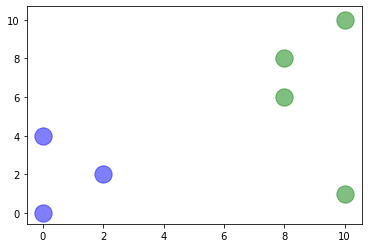

Centroids: 
 [[0.66666667 2.        ]
 [9.         6.25      ]]
Indexes per centroid: 
 [array([0, 1, 6]) array([2, 3, 4, 5])]


In [16]:
X=np.array([[0.,0.],
            [2,2],
            [10.,1.], 
            [10.,10.],
            [8,8],
            [8,6],            
            [0.,4]])

centroids, clusters = kmeans(X,2)

c1 = X[clusters[0],:]
c2 = X[clusters[1],:]

plt.scatter(c1[:,0], c1[:,1], s=300, alpha = 0.5, c="blue")
plt.scatter(c2[:,0], c2[:,1], s=300, alpha = 0.5, c="green")
plt.show()
print("Centroids: \n", centroids)
print("Indexes per centroid: \n",clusters)

### 2. K-means++

In this section we will our K-means++ implementation for clustering. The method K-means++ is similar to the original K-means except that it optimizes the initialization of the centroid, since instead of picking random values it chooses initial centroids with the maximum distance between them as possible in order to converge later faster.

For this excercise, we will use a data set downloaded from this link http://cs.joensuu.fi/sipu/datasets/a1.txt.

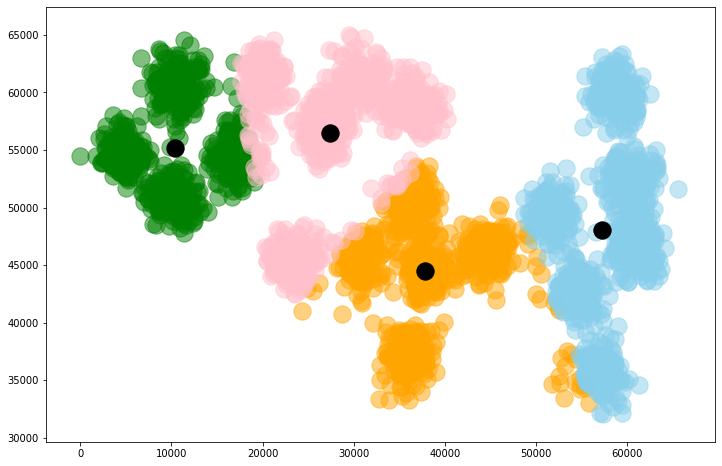

Centroids: 
 [[37793.46335079 44476.35732984]
 [10432.60205832 55212.72041166]
 [57269.30619266 48071.49311927]
 [27413.50448143 56510.34955186]]


In [4]:
data = pd.read_csv('./test.txt', sep="   ", header=None,engine='python')
X = np.array(data.values)

centroids, clusters = kmeans(X,4,centroids = 'kmeans++')

c1 = X[clusters[0],:]
c2 = X[clusters[1],:]
c3 = X[clusters[2],:]
c4 = X[clusters[3],:]
plt.figure(figsize=(12,8))

plt.scatter(c1[:,0], c1[:,1], s=300, alpha = 0.5, c="orange")
plt.scatter(c2[:,0], c2[:,1], s=300, alpha = 0.5, c="green")
plt.scatter(c3[:,0], c3[:,1], s=300, alpha = 0.5, c="skyblue")
plt.scatter(c4[:,0], c4[:,1], s=300, alpha = 0.5, c="pink")

plt.scatter(centroids[:,0], centroids[:,1], s=300, alpha = 1, c="black")
plt.show()

print("Centroids: \n", centroids)


Another example using K-means but using the most common target value in a cluster to estimate the accuracy of the clustering. 

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

X=cancer.data
y=cancer.target

k=2
centroids, clusters = kmeans(X, k=k, centroids='kmeans++', tolerance=.01)

y_pred=likely_predictions(y,clusters)

print("Confusion matrix: \n",confusion_matrix(y, y_pred))
print("The accuracy is:\n",accuracy_score(y, y_pred))


Confusion matrix: 
 [[ 41 171]
 [  0 357]]
The accuracy is:
 0.6994727592267135


### 3. Spectral Clustering

When the data is spherical(or globular, clear separeted densities) K-means works pretty well, but when the data has a different shape, K-means fails. Let's see the next example using K-means ++ where clearly there are two clusters but the algorithm can't find both clusters correctly.

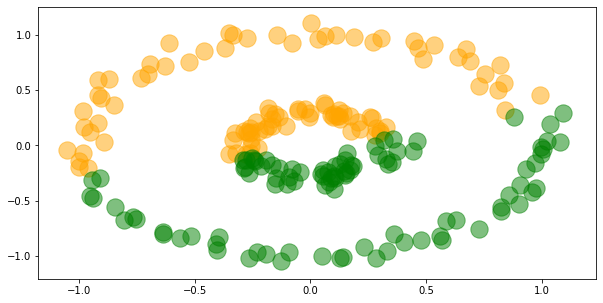

In [6]:
data = make_circles(n_samples=200, noise=0.05, factor=0.3)
X = data[0]

centroids, clusters = kmeans(X, k=k, centroids='kmeans++', tolerance=.01)

plt.figure(figsize=(10,5))
c1 = X[clusters[0],:]
c2 = X[clusters[1],:]
plt.scatter(c1[:,0], c1[:,1], s=300, alpha = 0.5, c="orange")
plt.scatter(c2[:,0], c2[:,1], s=300, alpha = 0.5, c="green")
plt.show()

In these cases, is better to use Spectral Clustering which is based on graph theory concepts: connectivity between components. We must follow the next steps:

1. Transform the raw data to a adjacency matrix using K-neighbors. Here, we will represent each observation like a node and find inner and outer edges based on euclidian distances.
2. Transform the adjacency matrix to a Laplace matrix where the diagonal will contain the degree of each node and the remaining values the negative edges weight.
3. Based on the eigen values of the Laplace matrix, we select the eigen vectors which have information about how to classify the original data. With those vectors, we use our K-means implementation to finish the clustering.

*Applying this technique to the previous data, we can see the Spectral Clustering can find with no problem those 2 clusters! 

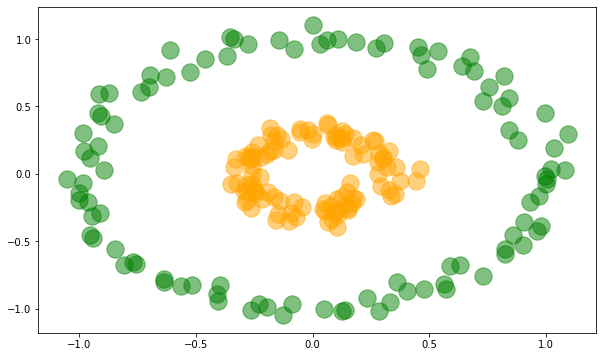

In [7]:
# Applying spectral clustering
clusters =[]
centroids=[]
k = 2
eigen_vectors = eigenVectors(X,k_neighbors=10,k_clusters=k)  
centroids, clusters = kmeans(eigen_vectors, k=k, centroids='kmeans++', tolerance=.01)

# Plotting the data
c1 = X[clusters[0],:]
c2 = X[clusters[1],:]

plt.figure(figsize=(10,6))
plt.scatter(c1[:,0], c1[:,1], s=300, alpha = 0.5, c="orange")
plt.scatter(c2[:,0], c2[:,1], s=300, alpha = 0.5, c="green")
plt.show()

### 4. Clustering application

We can use our own k-means implementation to compress images. The approach will be the following:

1. Read an image containing RGB pixels expressed in a 3D numpy array. 
2. Transform the numpy array into a 2d numpy array and apply k-means based on defined k clusters. This process will find similar colors (RGB) and will group them together with a specific centroid.
3. Map each pixel to the new centroid and reshape the 2d numpy array to the original 3D size.


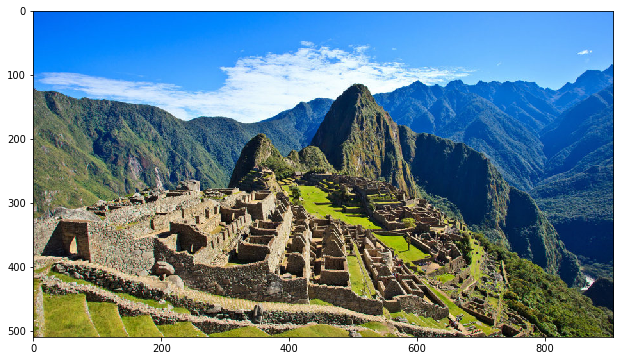

In [8]:
# Reading the image
img = mpimg.imread('./machupicchu.jpg') 
plt.figure(figsize = (40,6))
plt.imshow(img)

In [9]:
# Cluster and find the new centroids for each pixel
ini_time = time.time()
k = 30
h = img.shape[0]
w = img.shape[1]
X_ = reshapeImg_2dmatrix(img, h, w)
centroids, clusters = kmeans(X_, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)

end_time = time.time()
print("Clustering process time (sec):",(end_time-ini_time))


Clustering process time (sec): 9.260288953781128



And done! We have our compressed image and Machu Picchu still keeps its charm.

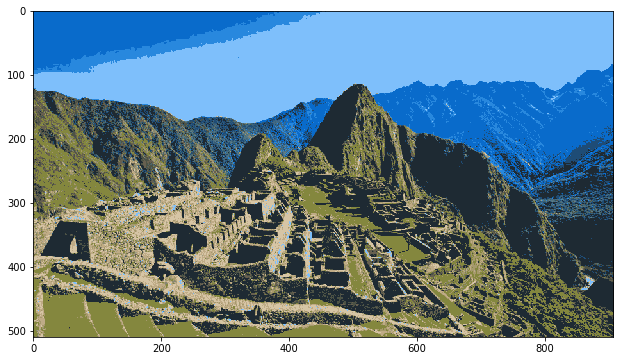

In [10]:
# Assign the centroids and reshape the array to the original image
X_ = reassign_colors(X_,clusters,centroids)
img_ = Image.fromarray(X_.reshape((h,w,3)))

plt.figure(figsize = (40,6))
plt.imshow(img_) 